,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


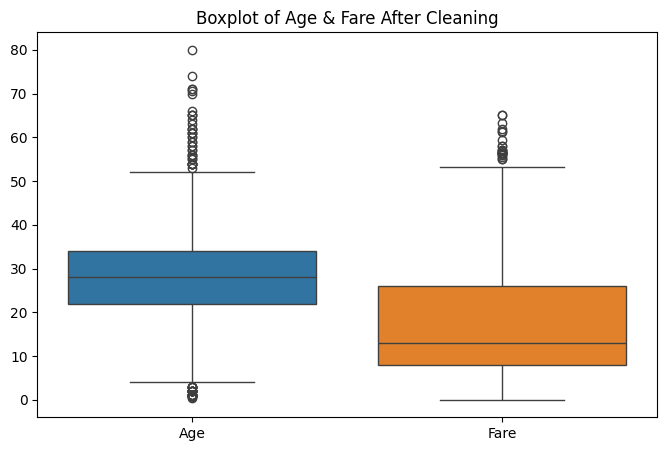

Cleaned dataset saved as cleaned_titanic.csv
Final dataset shape: (775, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.528321,1,0,A/5 21171,-0.779117,False,True
1,3,1,3,"Heikkinen, Miss. Laina",0,-0.215182,0,0,STON/O2. 3101282,-0.729373,False,True
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.489381,1,0,113803,2.599828,False,True
3,5,0,3,"Allen, Mr. William Henry",1,0.489381,0,0,373450,-0.720161,False,True
4,6,0,3,"Moran, Mr. James",1,-0.058613,0,0,330877,-0.690071,True,False


In [10]:
# -----------------------------------------
# 1. Import Libraries
# -----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

# -----------------------------------------
# 2. Load Dataset
# -----------------------------------------
df = pd.read_csv("data/titanic.csv")

# Basic exploration
display(df.head())
print(df.info())
display(df.describe(include="all"))
print("Missing values:\n", df.isnull().sum())

# -----------------------------------------
# 3. Handle Missing Values
# -----------------------------------------

# Fix warnings: DO NOT use inplace=True
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many missing)
df = df.drop(columns=['Cabin'])

# -----------------------------------------
# 4. Encoding Categorical Variables
# -----------------------------------------

# Label encode Sex
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])   # female=0, male=1

# One-hot encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# -----------------------------------------
# 5. Outlier Detection & Removal (Fare)
# -----------------------------------------
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df['Fare'] < lower_bound) | (df['Fare'] > upper_bound))].reset_index(drop=True)

# -----------------------------------------
# 6. Visualize Outliers
# -----------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot of Age & Fare After Cleaning")
plt.show()

# -----------------------------------------
# 7. Feature Scaling (Standardization)
# -----------------------------------------

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# -----------------------------------------
# 8. Save Cleaned Data
# -----------------------------------------
df.to_csv("cleaned_titanic.csv", index=False)
print("Cleaned dataset saved as cleaned_titanic.csv")

# -----------------------------------------
# 9. Show Final Data Summary
# -----------------------------------------
print("Final dataset shape:", df.shape)
display(df.head())


In [8]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive
